# Import libraries and Data

In [1]:
# import librariers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# defining path
path=r'/Users/ru/Desktop/CF/06_Achievement 6_VE'

In [9]:
# import data
df_ve = pd.read_csv(os.path.join(path,'02_06_Data','2.2_06_Prepared Data',
                                 'df_ve_wrangled.csv'), sep=',', encoding='cp1252')


In [10]:
matplotlib.__version__

'3.9.2'

In [11]:
df_ve.head(5)

,Unnamed: 0,Stimmart,Adresse,BezNr,BezNa,WahlBez,WahlBezArt,BriefwahlBez,AGHWK,BTWK,...,Stimmber A1,Stimmber A2,Stimmber A3,TeilN,TeilN B1,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein,Unnamed: 20
0,0,Stimme,01W100,1,Mitte,100,W,011A,1,75,...,880,741,0,519,12,11,508,299,209,NaN
1,1,Stimme,01W101,1,Mitte,101,W,011B,1,75,...,463,490,0,366,10,6,360,182,178,NaN
2,2,Stimme,01W102,1,Mitte,102,W,011B,1,75,...,591,692,0,406,10,8,398,217,181,NaN
3,3,Stimme,01W103,1,Mitte,103,W,011C,1,75,...,442,569,0,329,10,9,320,159,161,NaN
4,4,Stimme,01W104,1,Mitte,104,W,011D,1,75,...,638,639,0,522,17,10,512,263,249,NaN


In [12]:
df_ve.columns

Index(['Unnamed: 0', 'Stimmart', 'Adresse', 'BezNr', 'BezNa', 'WahlBez',
       'WahlBezArt', 'BriefwahlBez', 'AGHWK', 'BTWK', 'OstWest',
       'Stimmber  total', 'Stimmber A1', 'Stimmber A2', 'Stimmber A3', 'TeilN',
       'TeilN B1', 'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein',
       'Unnamed: 20'],
      dtype='object')

In [17]:
# exclude strings in columns
df1=df_ve[['BezNr','Stimmber  total', 'TeilN', 'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein']]

In [18]:
df1.head(5)


,BezNr,Stimmber total,TeilN,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein
0,1,1621,519,11,508,299,209
1,1,953,366,6,360,182,178
2,1,1283,406,8,398,217,181
3,1,1011,329,9,320,159,161
4,1,1277,522,10,512,263,249


In [19]:
# correlation
df1.corr()

,BezNr,Stimmber total,TeilN,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein
BezNr,1.000000,-0.011389,-0.104129,0.106655,-0.114137,-0.227521,0.072189
Stimmber total,-0.011389,1.000000,-0.264529,0.322110,-0.294621,-0.213832,-0.234143
TeilN,-0.104129,-0.264529,1.000000,0.074731,0.995854,0.782586,0.724096
Unglt Stimme,0.106655,0.322110,0.074731,1.000000,-0.016295,-0.053582,0.034062
Glt Stimme,-0.114137,-0.294621,0.995854,-0.016295,1.000000,0.789564,0.722922
Stimme Ja,-0.227521,-0.213832,0.782586,-0.053582,0.789564,1.000000,0.146793
Stimme Nein,0.072189,-0.234143,0.724096,0.034062,0.722922,0.146793,1.000000


# creating visualizations

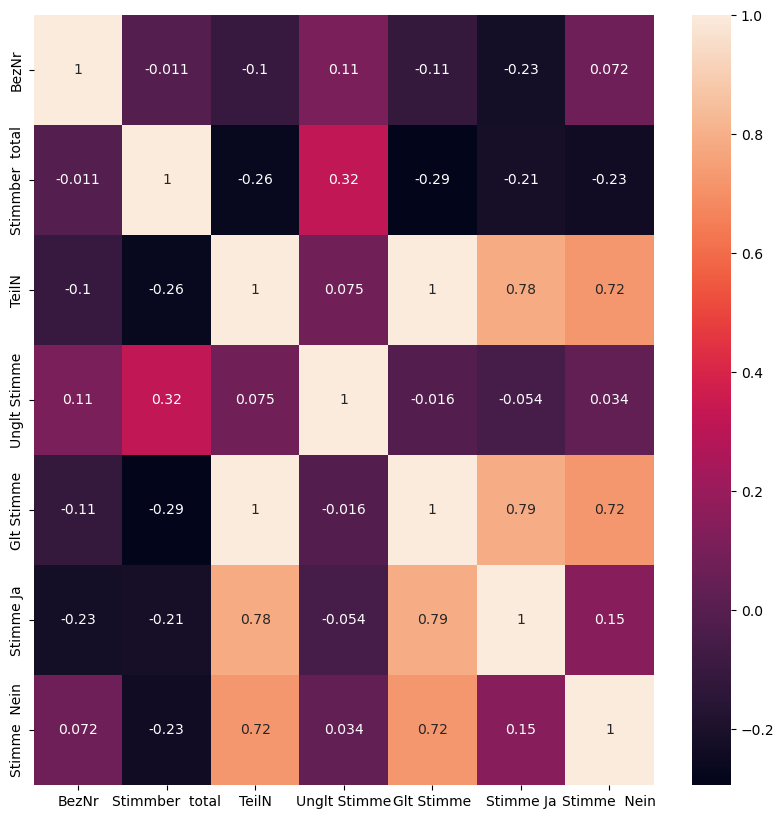

In [20]:
## Create a HEATMAP as described in the example
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df1.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [22]:
# save image
corr.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'heatmap_VE.png'))


COMMENT
The bright and peach-coloured fields with numbers between 1 and 0.72 signify a strong positive correlation.
These are basically participants/valid votes (which is the clear majority compared to unvalit votes) with yes/no votes.
The black fields (around -0,2) signifys a a week negative correlation between the total of eliable voters and yes/no/valid votes.
The two pink fields (0.32) signify a moderate positive correlation (eliable voters total with unvalid votes) parralel to negative correlation of eliable voters and valid votes (-0,29) 
The purple couloured field tending towards 0 signify no correlation.

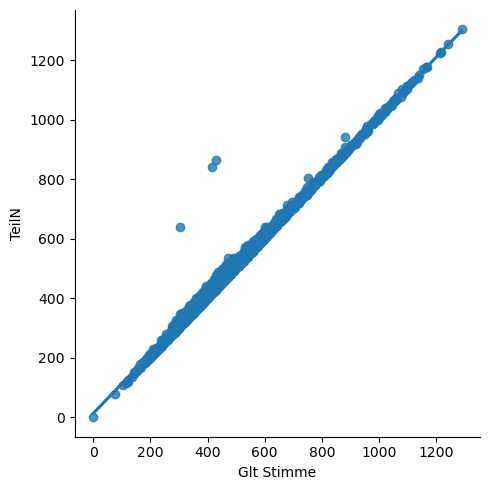

In [25]:
# Create a SCATTERPLOTs
# for the "gültige stimmen" (valid votes) and "TeilNehmer" (Participants) columns in seaborn

sct_glt_teilN = sns.lmplot(x = 'Glt Stimme', y = 'TeilN', data = df1)

In [29]:
# save image
sct_glt_teilN.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'sct_glt_teilN_VE.png'))

COMMENT
What we see is (as expected) a very strong relationship between TeilN (participants) and Glt Stimme (valid votes)
I ask myself if the 3 outliers are the unvalid votes, which are around 3%?

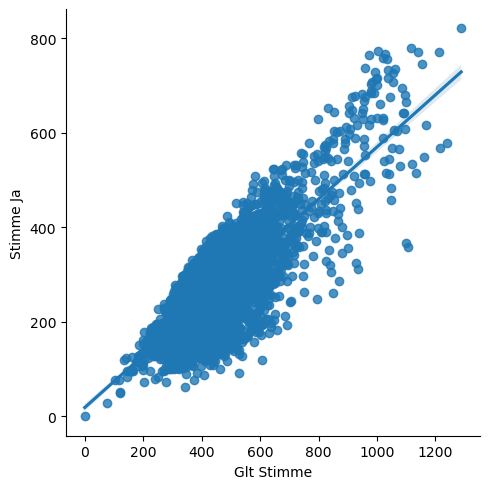

In [30]:
# valid votes and yes votes
sct_glt_yes=sns.lmplot(x = 'Glt Stimme', y = 'Stimme Ja', data = df1)

In [31]:
#save image
sct_glt_yes.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'sct_glt_yes_VE.png'))

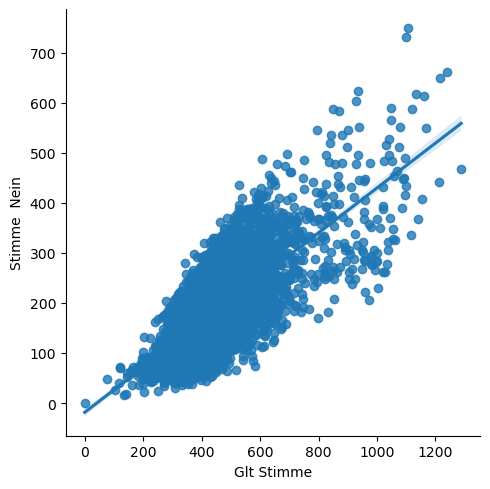

In [32]:
# valid votes and no votes
sct_glt_no=sns.lmplot(x = 'Glt Stimme', y = 'Stimme  Nein', data = df1)

In [33]:
# save image
sct_glt_no.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'sct_glt_no_VE.png'))

COMMENT
there is a very similar pattern of the correlation between valid votes and yes/no votes
I guess because the ratio of yes and no is quite similar. Neverthe less the yes votes with the higher ratio are closer to the line: the more valit votes, the more yes votes.

In [34]:
# Create a PAIR PLOT
# Keep only the variables you want to use

sub = df1[['Stimmber  total', 'TeilN', 'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein']]

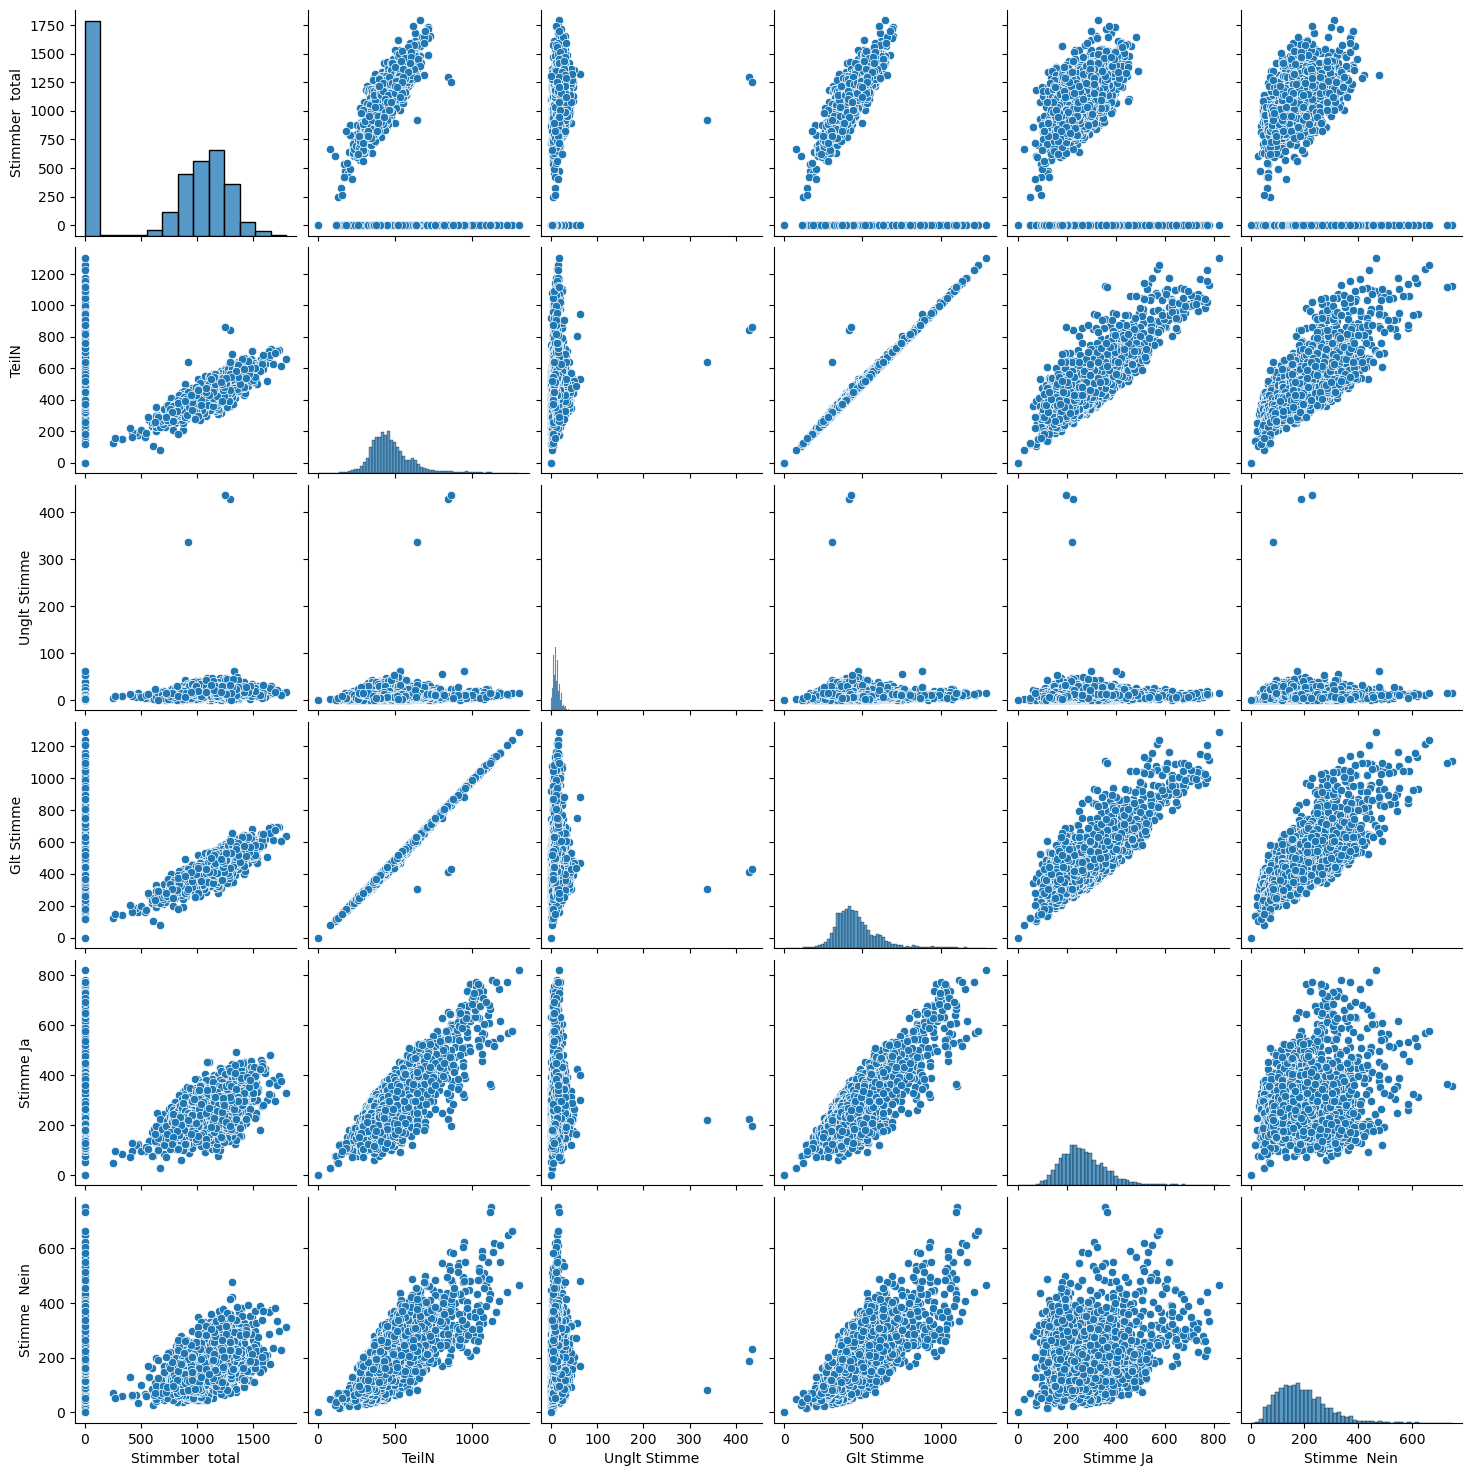

In [35]:
g = sns.pairplot(sub)

In [36]:
# save image
g.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'pairplot_VE.png'))

COMMENT
the pair plot shows that only a couple of combination make sense. 
for example: stimmberechtigte total and TeilN makes sense in all combinations 
But the relationship between yes and no votes does not make sense (random distribution) and to put ungültiges stimmen also seems to be useless. 

In [ ]:
Create a CATPLOT

COMMENT:
the catplot as described in the exercise only makes limited sense in the context of my dataset. 
Because there is no continous variable where it make sense to built categories out of. 
To do the task anyway I worked a little bit around and made categories out of the districts - center and peripherie. But since the variable is not splitted up in itself (as in the example with the price per unit which is splitted up in low, middle and high) the result in the catplot looks quite different.

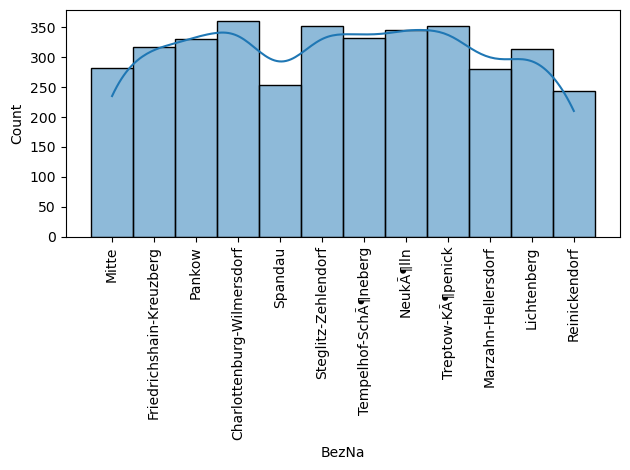

In [39]:
# create a histogramm
bez=sns.histplot(df_ve['BezNa'],kde = True)
plt.xticks(rotation=90) # senkrecht
plt.tight_layout() # verhindert Schnitt
plt.show()

In [75]:
# save image
bez.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'hist_bez_VE.png'))

In [70]:
# define categories - use the numbers of districts instead of the names since it comes to problesms with special german characters
center = [1, 2, 3, 4, 7,8 ]



In [71]:
# assign categories
df_ve.loc[df_ve['BezNr'].isin(center), 'bezirk_kategorie'] = 'center' 
df_ve.loc[~df_ve['BezNr'].isin(center), 'bezirk_kategorie'] = 'peripherie'

In [72]:
df_ve.columns

Index(['Unnamed: 0', 'Stimmart', 'Adresse', 'BezNr', 'BezNa', 'WahlBez',
       'WahlBezArt', 'BriefwahlBez', 'AGHWK', 'BTWK', 'OstWest',
       'Stimmber  total', 'Stimmber A1', 'Stimmber A2', 'Stimmber A3', 'TeilN',
       'TeilN B1', 'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein',
       'Unnamed: 20', 'bezirk_kategorie'],
      dtype='object')

In [73]:
# count categories
df_ve['bezirk_kategorie'].value_counts(dropna = False)

bezirk_kategorie
center        1969
peripherie    1795
Name: count, dtype: int64

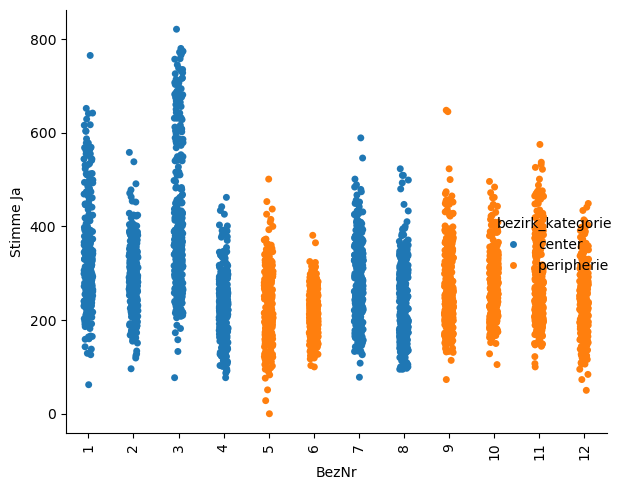

In [74]:
# create a catplot
c = sns.catplot(x='BezNr', y='Stimme Ja', hue='bezirk_kategorie', data=df_ve)
plt.xticks(rotation=90) # senkrecht
plt.tight_layout() # verhindert Schnitt
plt.show()

In [76]:
# save image
c.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'cat_bez_VE.png'))